<a href="https://colab.research.google.com/github/tubagusibrohim/Clustering_MallCustomer/blob/main/Clustering_MallCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Mall Customer

Analisis cluster atau pengelompokan adalah tugas pengelompokan sekumpulan objek sedemikian rupa sehingga objek dalam grup yang sama (disebut cluster) lebih mirip (dalam beberapa hal) satu sama lain dibandingkan dengan objek di grup lain (cluster).

Di sini saya memodelkan pengelompokan dari dataset mall customer. Saya menggunakan model ini untuk melakukan segmentasi pelanggan. Saya membedakan pelanggan menjadi jumlah grup yang optimal berdasarkanjenis kelamin, umur, pendapatan per tahun, dan skor pengeluaran mereka.

### **Import Libraries**

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Dataset**

In [8]:
# Import Dataset
df_mallcust = pd.read_csv('https://raw.githubusercontent.com/tubagusibrohim/Clustering_MallCustomer/main/Mall_Customers.csv')
df_mallcust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### **Data Preprocessing**

In [9]:
# Prints the Dataset Information
df_mallcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Prints Descriptive Statistics
df_mallcust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Cek Missing Value dan Outlier**

In [16]:
df_mallcust.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [17]:
#Check Missing Value dan Outlier
dataset = df_mallcust.replace('?',np.nan)

percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_data = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
missing_value_data

,column_name,percent_missing
CustomerID,CustomerID,0.0
Gender,Gender,0.0
Age,Age,0.0
Annual Income (k$),Annual Income (k$),0.0
Spending Score (1-100),Spending Score (1-100),0.0


In [19]:
percent_missval=round((dataset.isnull().sum().sum() / dataset.count().sum()) * 100, 2)
print('total missing values : {}%'.format(percent_missval))

total missing values : 0.0%


In [24]:
#Duplikasi data
pd.set_option('display.max_rows',  None)
duplicate = dataset[dataset.duplicated()] 
print('duplikasi data: {}'.format(len(duplicate)))
duplicate_all = dataset[dataset.duplicated(keep=False)]
print('jumlah list data duplikat: {}'.format(len(duplicate_all)))
duplicate_all

duplikasi data: 0
jumlah list data duplikat: 0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [21]:
df_mallcust = df_mallcust.drop(['CustomerID'], axis=1)

Attribut Customer ID tidak akan dipakai untuk clustering.

In [22]:
df_mallcust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


**Encoding**

In [23]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_mallcust.columns.tolist()
column_names.remove('Gender')
df_mallcust[column_names] = scaler.fit_transform(df_mallcust[column_names])
df_mallcust.sort_index(inplace=True)
df_mallcust

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,Female,-0.276302,2.268791,1.118061
196,Female,0.441365,2.497807,-0.861839
197,Male,-0.491602,2.497807,0.923953
198,Male,-0.491602,2.917671,-1.250054


###Data Visualization

**Annual Income(k$) and Spending Score**

Text(0, 0.5, 'Spending Score (1-100)')

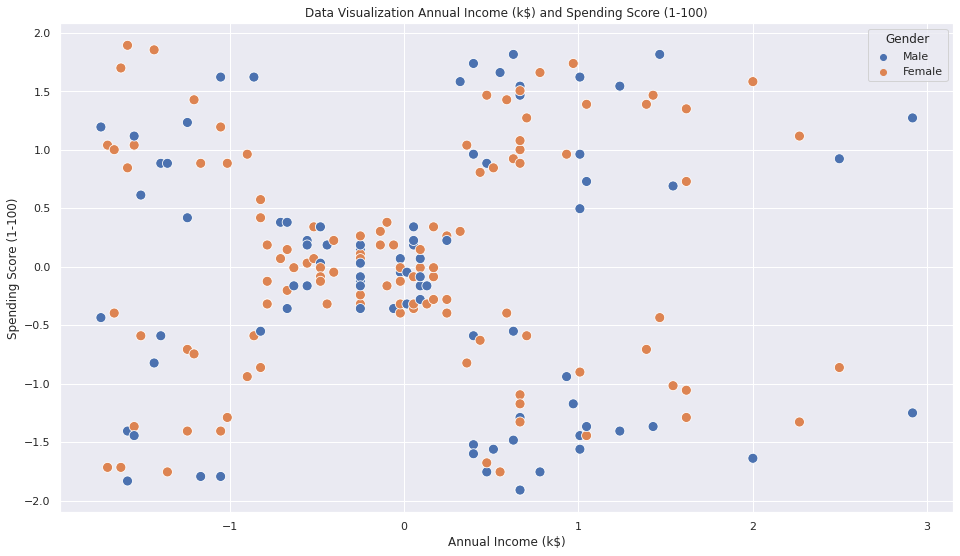

In [26]:
# Styling Plot
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df_mallcust,s=100)
plt.title('Data Visualization Annual Income (k$) and Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

**Age & Annual Income**

Text(0, 0.5, 'Annual Income (k$)')

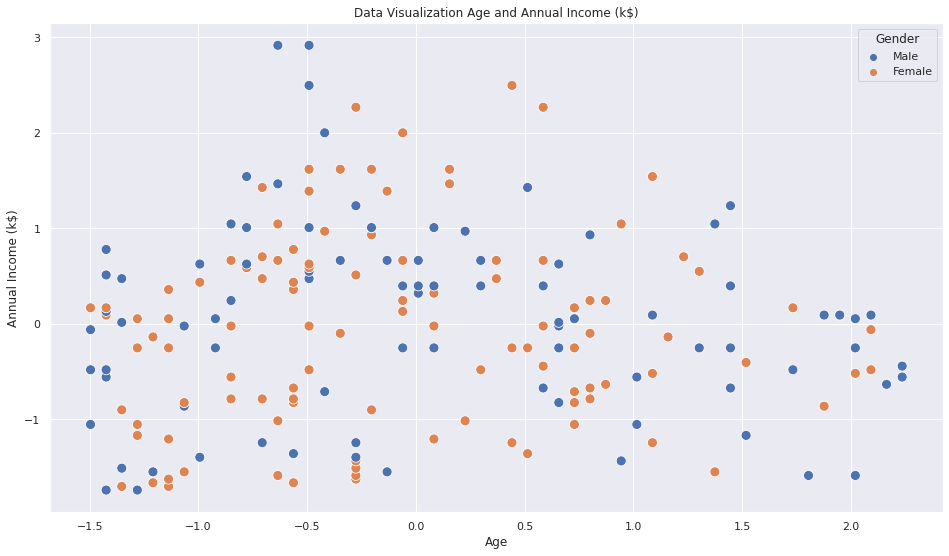

In [27]:
# Styling Plot
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df_mallcust,s=100)
plt.title('Data Visualization Age and Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

**Age and Spending Score**

Text(0, 0.5, 'Spending Score (1-100)')

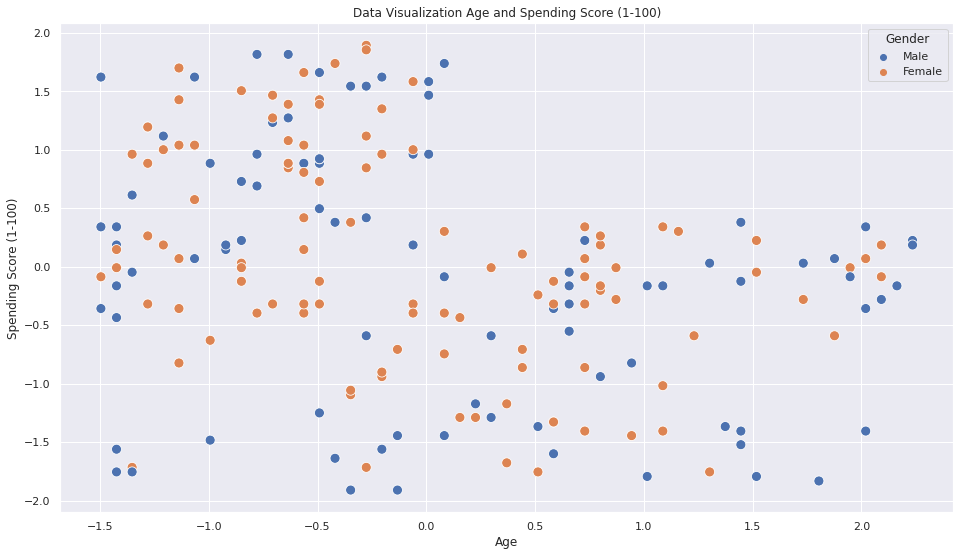

In [28]:
# Styling Plot
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df_mallcust, s=100)
plt.title('Data Visualization Age and Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

**Age, Annual Income , and Spending Score**

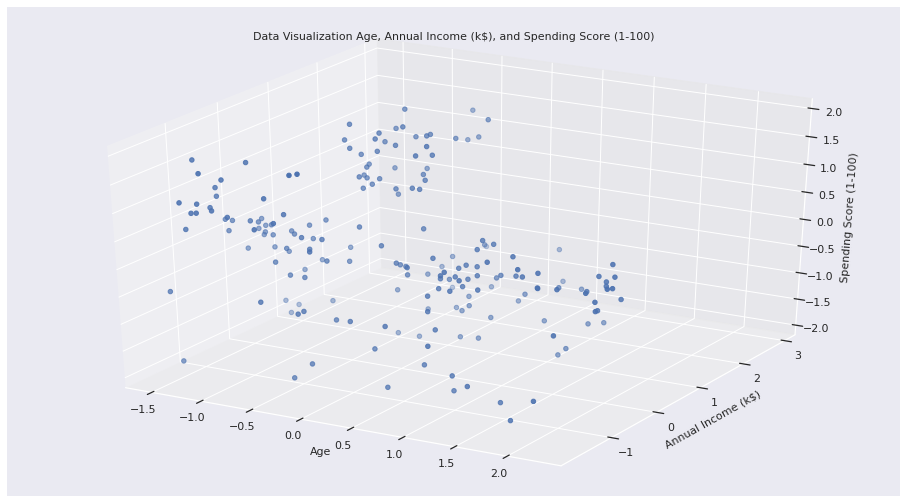

In [29]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_mallcust['Age'], df_mallcust['Annual Income (k$)'], df_mallcust['Spending Score (1-100)'], s=20)
ax.set_xlabel('Age',fontsize=11)
ax.set_title('Data Visualization Age, Annual Income (k$), and Spending Score (1-100)',fontsize=11)
ax.set_ylabel('Annual Income (k$)',fontsize=11)
ax.set_zlabel('Spending Score (1-100)',fontsize=11)
ax.view_init()
plt.show()

Setelah melihat visualisasi data dari beberapa skenario, disini saya akan mencoba untuk melakukan analisis menggunakan 2 skenario saja, yaitu :

Annual Income (k$) dan Spending Score (1-100),

Age, Annual Income (k$), dan Spending Score (1-100).

In [33]:
#Set Target and Feature
features = df_mallcust.drop(['Gender'], axis=1)
features_ai = features.drop(['Spending Score (1-100)'], axis=1)
features_as = features.drop(['Annual Income (k$)'], axis=1)
feautres_is = features.drop(['Age'], axis=1)

###K-means Clustering

Algoritma Kmeans adalah algoritma iteratif yang mencoba untuk mempartisi dataset menjadi subkelompok (cluster) non-overlapping berbeda yang ditentukan oleh Kpre dimana setiap titik data hanya dimiliki oleh satu kelompok. Ini mencoba untuk membuat titik data antar cluster semirip mungkin sambil juga menjaga cluster sejauh mungkin. Ini menetapkan poin data ke cluster sedemikian rupa sehingga jumlah jarak kuadrat antara titik data dan pusat massa cluster (rata-rata aritmatika dari semua titik data yang termasuk dalam cluster itu) minimal. Semakin sedikit variasi yang kita miliki dalam cluster, semakin homogen (serupa) titik data dalam cluster yang sama.


###Skenario 1

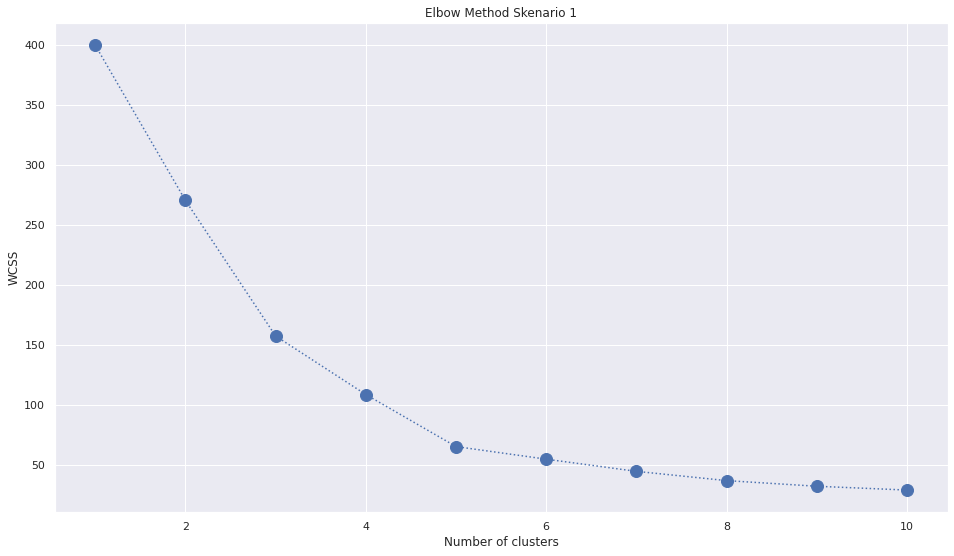

In [34]:
#Mencari Nilai K menggunakan Elbow Method

#Transform Data Frame to Numpy Array
income = feautres_is.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss,'o:',markersize=12)
plt.title('Elbow Method Skenario 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Dengan menggunakan elbow method didapatkan **K=5**

In [35]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_coeffs = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    sil_coeffs.append(sil_coeff)
    print('Di n_clusters={}, Silhouette Coefficient-nya adalah {}'.format(n_cluster, sil_coeff))

Di n_clusters=2, Silhouette Coefficient-nya adalah 0.29512063001659344
Di n_clusters=3, Silhouette Coefficient-nya adalah 0.46658474419000145
Di n_clusters=4, Silhouette Coefficient-nya adalah 0.4939069237513199
Di n_clusters=5, Silhouette Coefficient-nya adalah 0.5546571631111091
Di n_clusters=6, Silhouette Coefficient-nya adalah 0.5380630705007141
Di n_clusters=7, Silhouette Coefficient-nya adalah 0.5263454490712252
Di n_clusters=8, Silhouette Coefficient-nya adalah 0.45543473014577757
Di n_clusters=9, Silhouette Coefficient-nya adalah 0.4566624374485964
Di n_clusters=10, Silhouette Coefficient-nya adalah 0.46178584632094427


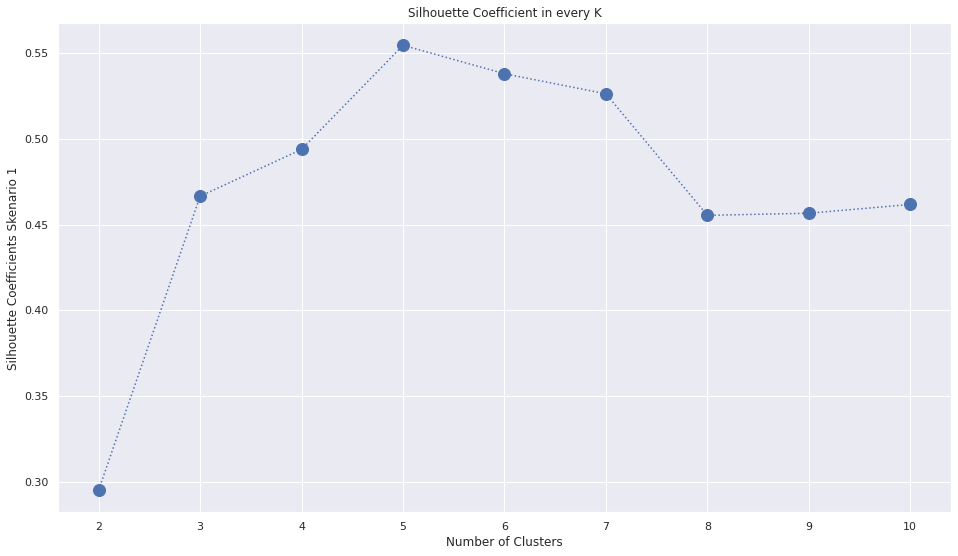

In [36]:
plt.plot(range(2,11),sil_coeffs,'o:',markersize=12)
plt.title("Silhouette Coefficient in every K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients Skenario 1")
plt.show()

Berdasarkan visualisasi dan data Silhouette method yang telah dilakukan, nilai K terbaik berada di **K = 5** juga.

Maka dapat disimpulkan pada skenario 1 ini, saya akan menggunakan nilai **K = 5**

###Skenario 2

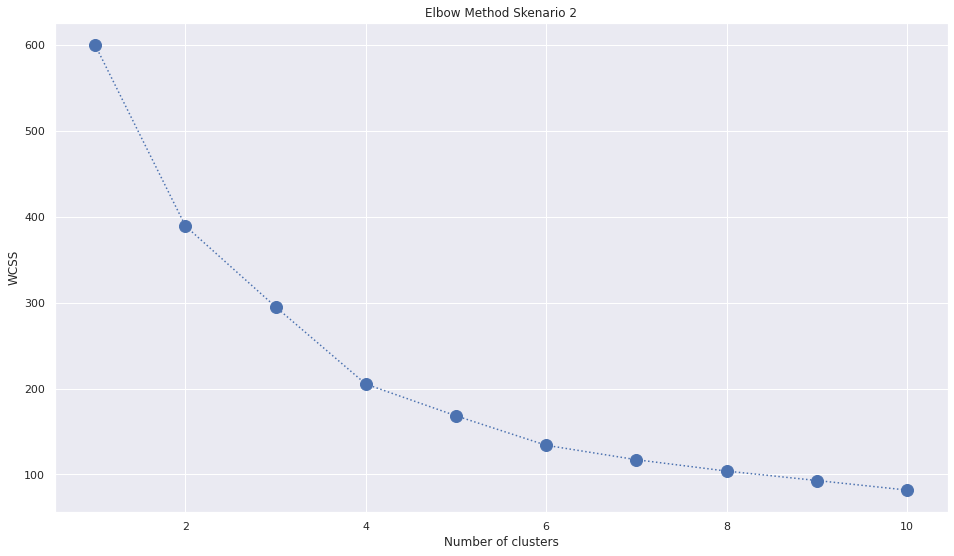

In [37]:
# Transform Data Frame to Numpy Array
ftrs = features.to_numpy()
ftrs

# Elbow Method
from sklearn.cluster import KMeans
wcss_3d = []
for i in range(1,11):
    kmeans_3d = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_3d.fit(ftrs)
    wcss_3d.append(kmeans_3d.inertia_)

# Visualize 
plt.plot(range(1,11),wcss_3d,'o:',markersize=12)
plt.title('Elbow Method Skenario 2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Dengan menggunakan elbow method didapatkan **K=6**

In [38]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_coeffs_3d = []
for n_cluster in range(2, 11):
    kmeans_3d = KMeans(n_clusters=n_cluster).fit(ftrs)
    label = kmeans_3d.labels_
    sil_coeff_3d = silhouette_score(ftrs, label, metric='euclidean')
    sil_coeffs_3d.append(sil_coeff_3d)
    print('Di n_clusters={}, Silhouette Coefficient-nya adalah {}'.format(n_cluster, sil_coeff_3d))

Di n_clusters=2, Silhouette Coefficient-nya adalah 0.33547192894004574
Di n_clusters=3, Silhouette Coefficient-nya adalah 0.357793388710272
Di n_clusters=4, Silhouette Coefficient-nya adalah 0.4039582785148566
Di n_clusters=5, Silhouette Coefficient-nya adalah 0.41664341513732767
Di n_clusters=6, Silhouette Coefficient-nya adalah 0.4268547747113388
Di n_clusters=7, Silhouette Coefficient-nya adalah 0.4180766295787896
Di n_clusters=8, Silhouette Coefficient-nya adalah 0.4109827482212367
Di n_clusters=9, Silhouette Coefficient-nya adalah 0.41981154842515983
Di n_clusters=10, Silhouette Coefficient-nya adalah 0.4009851599728204


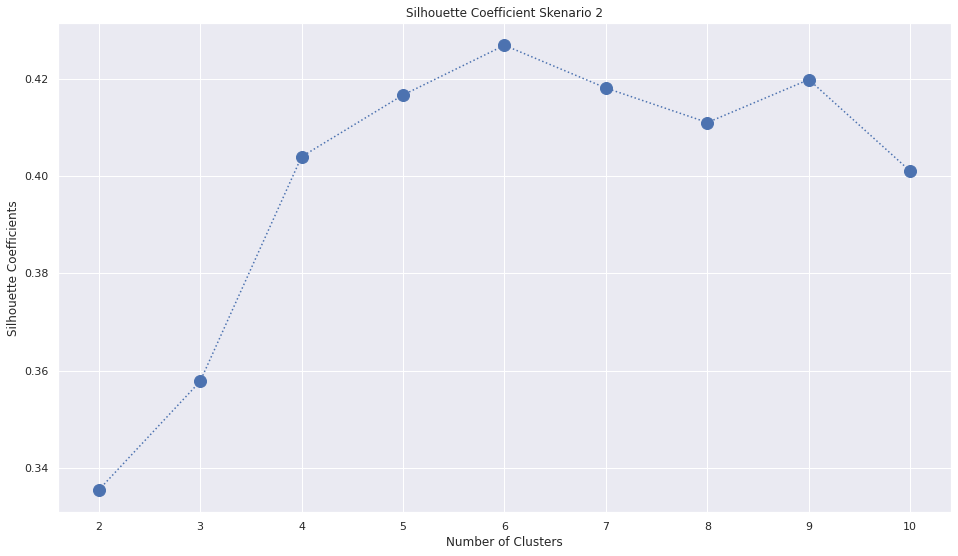

In [39]:
plt.plot(range(2,11),sil_coeffs_3d,'o:',markersize=12)
plt.title("Silhouette Coefficient Skenario 2")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()


Berdasarkan visualisasi dan data Silhouette method yang telah dilakukan, nilai K terbaik berada di **K = 6** juga.

Maka dapat disimpulkan pada skenario 2 ini, saya akan menggunakan nilai **K = 6**

###Modeling K-Means

**Skenario 1**

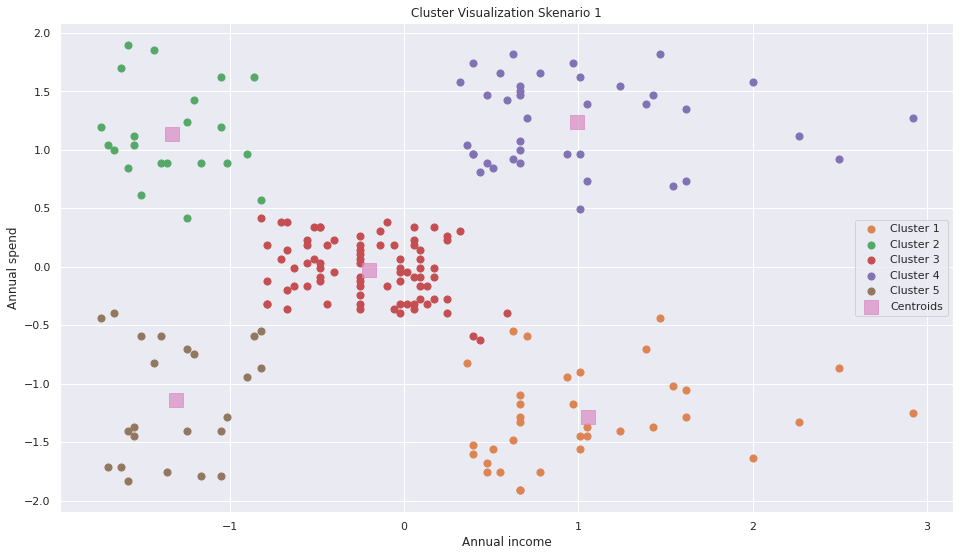

In [40]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=feautres_is)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[cluster == 4, 0], income[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Cluster Visualization Skenario 1')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [42]:
#Memasukkan data cluster ke dataset
df_mallori = pd.read_csv('https://raw.githubusercontent.com/tubagusibrohim/Clustering_MallCustomer/main/Mall_Customers.csv')
df_mallori['cluster_skenario_1'] = cluster+1
df_mallori

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_skenario_1
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
5,6,Female,22,17,76,2
6,7,Female,35,18,6,5
7,8,Female,23,18,94,2
8,9,Male,64,19,3,5
9,10,Female,30,19,72,2


###Skenario 2

In [43]:
kmeans_3d = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_3d = kmeans_3d.fit_predict(ftrs)

In [44]:
df_mallori['cluster_3d_skenario_2'] = cluster_3d+1
df_mallori

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_skenario_1,cluster_3d_skenario_2
0,1,Male,19,15,39,5,2
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,5,6
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,5,6
5,6,Female,22,17,76,2,2
6,7,Female,35,18,6,5,6
7,8,Female,23,18,94,2,2
8,9,Male,64,19,3,5,6
9,10,Female,30,19,72,2,2


###**Hierarichal Clustering**

**Skenario 1**

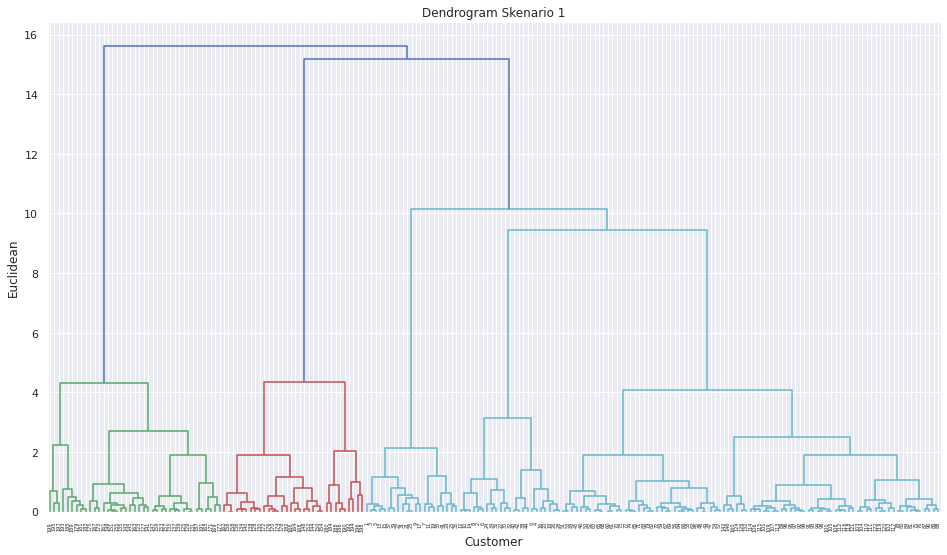

In [45]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram Skenario 1')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

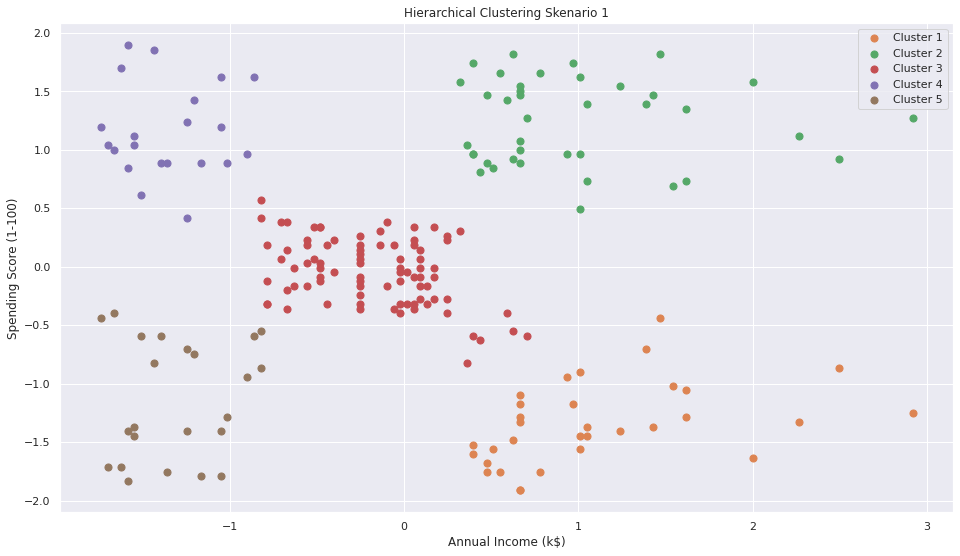

In [46]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=feautres_is)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[hcluster == 3, 0], income[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[hcluster == 4, 0], income[hcluster == 4, 1], s = 50, label = 'Cluster 5')
plt.title('Hierarchical Clustering Skenario 1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Skenario 2**

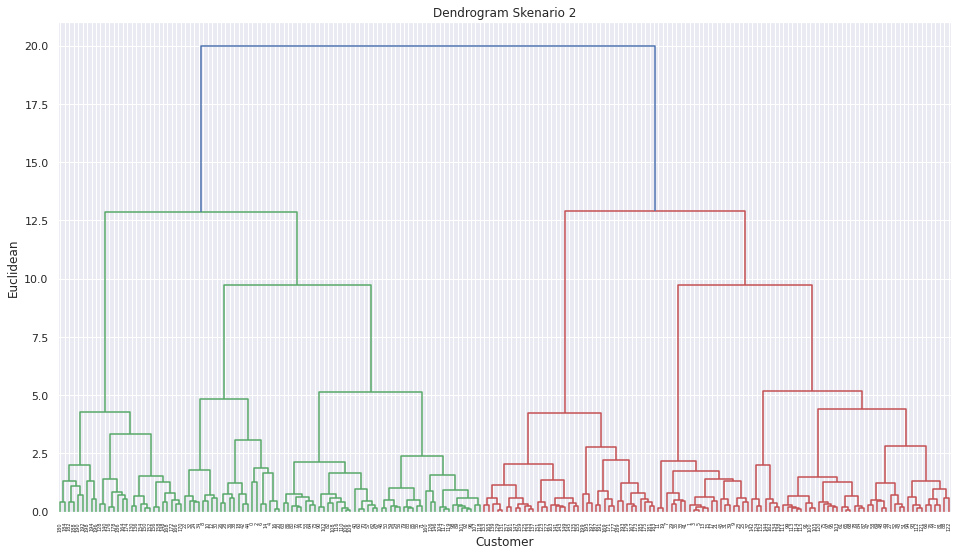

In [47]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend_3d = sch.dendrogram(sch.linkage(ftrs, method='ward'))
plt.title('Dendrogram Skenario 2')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()


##Kesimpulan

**Skenario 1**

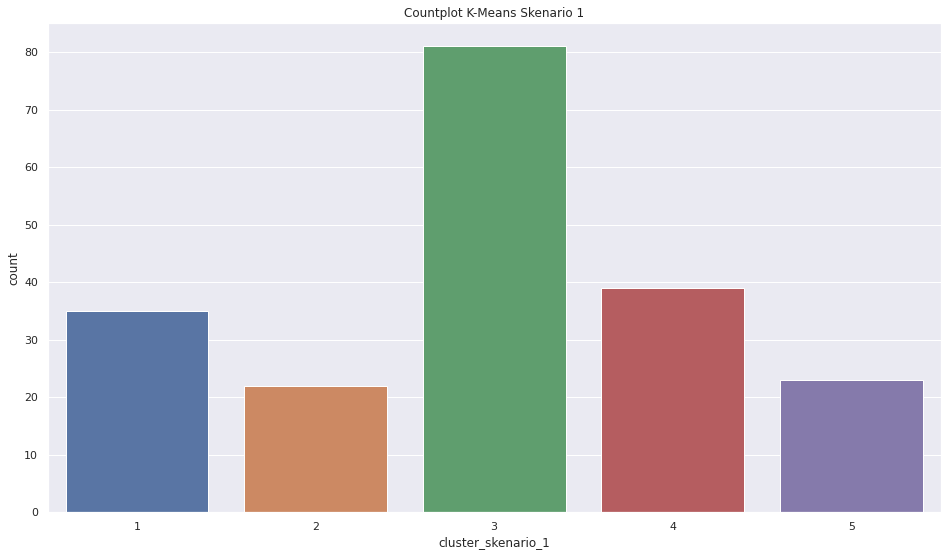

In [49]:
plt.figure(figsize=(16, 9))
plt.title('Countplot K-Means Skenario 1')
sns.countplot(x = df_mallori['cluster_skenario_1'])
plt.show()

**Skenario2**

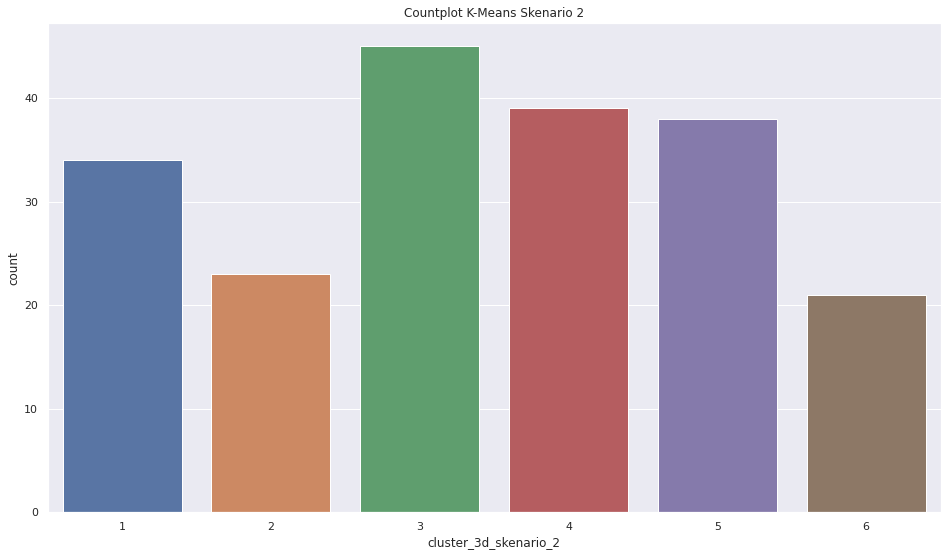

In [50]:
plt.figure(figsize=(16, 9))
plt.title('Countplot K-Means Skenario 2')
sns.countplot(x = df_mallori['cluster_3d_skenario_2'])
plt.show()

Pada K-Means Clustering :

Skenario 1 mempunyai nilai K optimum, yaitu K = 5, dimana nilai Silhoutte Coefficient-nya = 0.55,
Skenario 2 mempunyai nilai K optimum, yaitu K = 6, dimana nilai Silhoutte Coefficient-nya = 0.43.